In [59]:
import os
import pandas as pd
os.chdir("C:/Training/Academy/Statistics (Python)/Datasets")
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Cow's Milk Production

In [2]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
df.head()
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

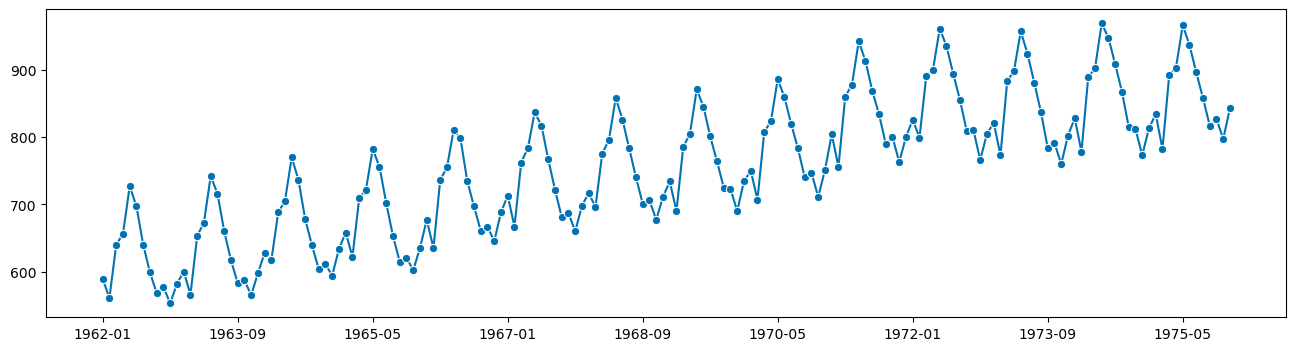

In [3]:
plot_series(df)

In [4]:
y = df['Milk']
y_train, y_test = temporal_train_test_split(y,test_size=12)
print(y_train.shape, y_test.shape)

(156,) (12,)


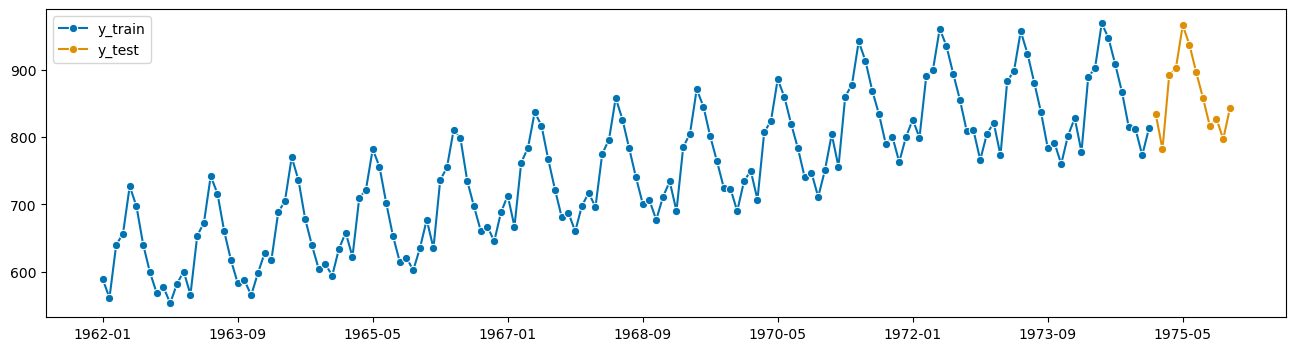

In [5]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

Specifying a forecasting horizon

In [6]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
             '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12'],
            dtype='period[M]', is_relative=False)

### Exponential Smoothing

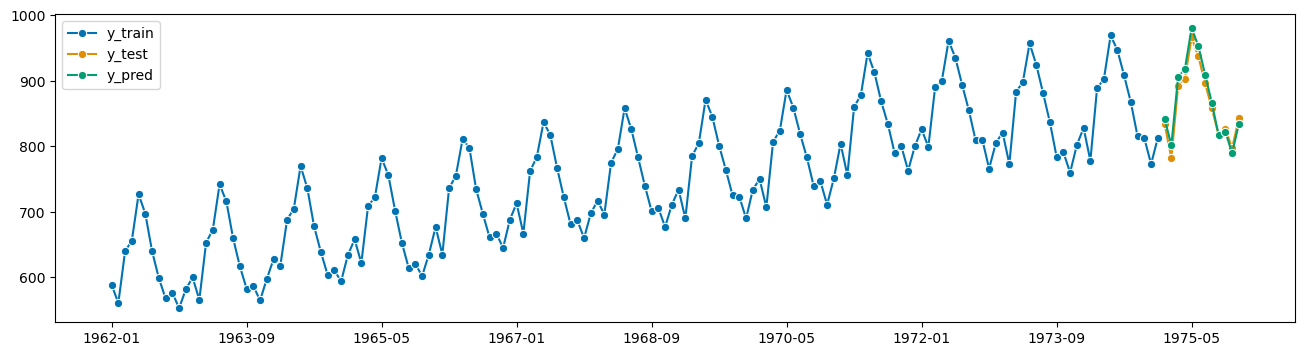

In [7]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [8]:
mean_squared_error(y_test, y_pred,square_root=True)

11.927326759806716

### AutoETS

In [9]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  156
Model:                       ETS(AAA)   Log Likelihood                -527.851
Date:                Thu, 16 Nov 2023   AIC                           1091.703
Time:                        18:44:14   BIC                           1146.600
Sample:                    01-31-1962   HQIC                          1114.000
                         - 12-31-1974   Scale                           50.879
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.6988      0.078      8.986      0.000       0.546       0.851
smoothing_trend      6.988e-05        nan        nan        nan         nan         nan
smoothing_season

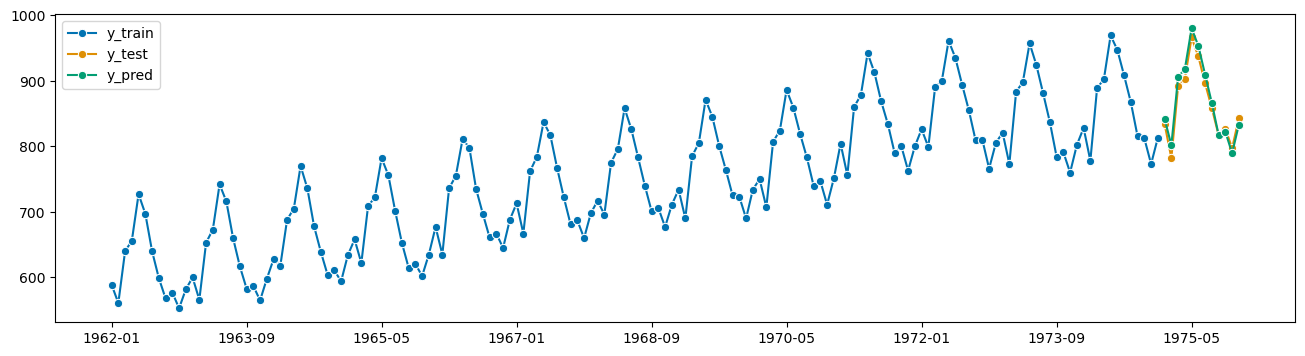

In [10]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [11]:
mean_squared_error(y_test, y_pred,square_root=True)

12.00429026271781

## GDP per Capita

In [12]:
gdp = pd.read_csv("gdp-per-capita-ppp-constant-2011.csv", index_col=0)
gdp.shape

(28, 1)

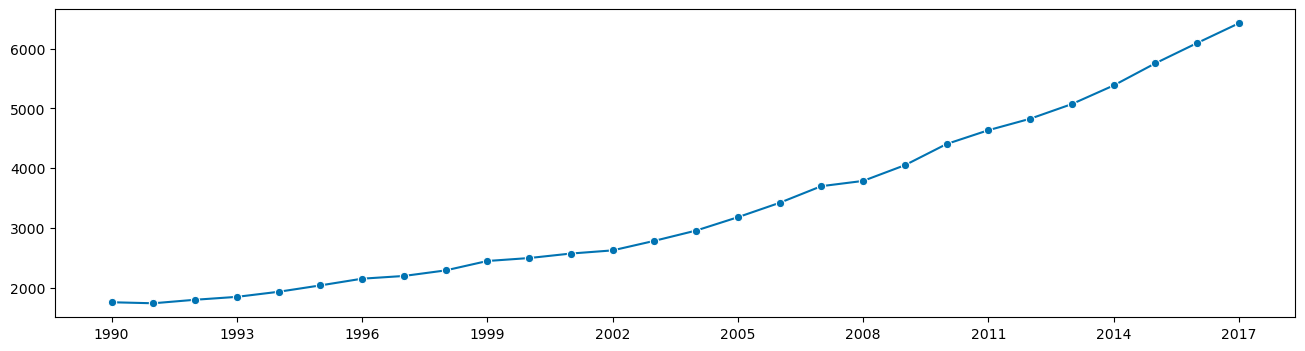

In [13]:
idx = pd.PeriodIndex(gdp.index, freq="Y")
gdp.index = idx
plot_series(gdp)
plt.show()

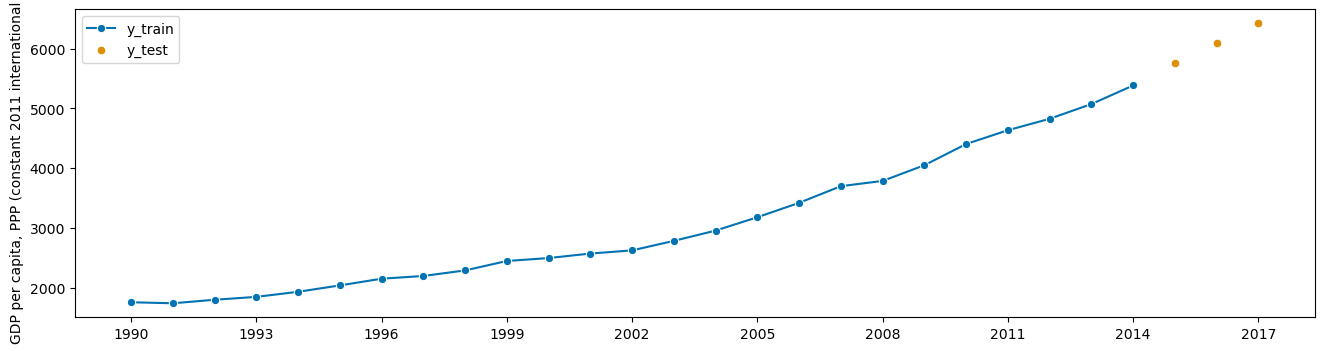

In [14]:
y = gdp.iloc[:,0]
y_train, y_test = temporal_train_test_split(y, test_size=3)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

In [15]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2015', '2016', '2017'], dtype='period[A-DEC]', is_relative=False)

### AutoETS

In [16]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                                  ETS Results                                                  
Dep. Variable:     GDP per capita, PPP (constant 2011 international $)   No. Observations:                   25
Model:                                                        ETS(MAN)   Log Likelihood                -138.837
Date:                                                 Thu, 16 Nov 2023   AIC                            287.674
Time:                                                         18:44:15   BIC                            293.768
Sample:                                                     12-31-1990   HQIC                           289.364
                                                          - 12-31-2014   Scale                            0.000
Covariance Type:                                                approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------

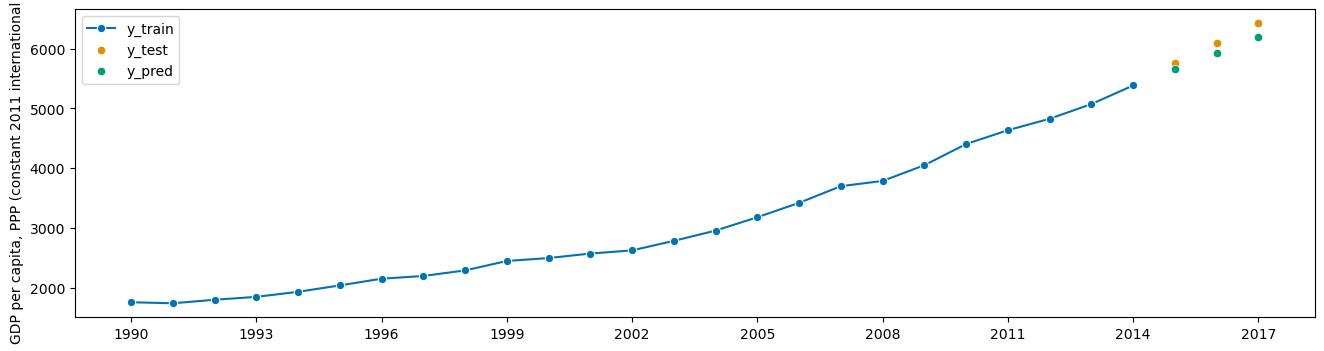

In [17]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [18]:
mean_squared_error(y_test, y_pred,square_root=True)

171.73202018308513

## AV - Time Series

In [42]:
avt_train = pd.read_csv("C:/Training/AV/Time Series/Train_SU63ISt.csv", index_col=1)
avt_train.head()

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2


In [45]:
idx = pd.to_datetime(avt_train.index).to_period("H")
avt_train.index = idx
avt_train.head()

,ID,Count
Datetime,,
2012-08-25 00:00,0,8
2012-08-25 01:00,1,2
2012-08-25 02:00,2,6
2012-08-25 03:00,3,2
2012-08-25 04:00,4,2


In [47]:
y_train = avt_train['Count']
type(y_train)

pandas.core.series.Series

In [48]:
forecaster = AutoETS(auto=True, sp=24)
forecaster.fit(y_train)
print(forecaster.summary())

C:\Users\Sanjay Sane\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 ETS Results                                  
Dep. Variable:                  Count   No. Observations:                18288
Model:                       ETS(MAM)   Log Likelihood              -82910.678
Date:                Thu, 16 Nov 2023   AIC                         165881.355
Time:                        19:28:00   BIC                         166115.775
Sample:                    08-25-2012   HQIC                        165958.384
                         - 09-25-2014   Scale                            0.106
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3355      0.004     75.717      0.000       0.327       0.344
smoothing_trend      3.355e-05   1.65e-05      2.032      0.042     1.2e-06    6.59e-05
smoothing_season

In [49]:
avt_test = pd.read_csv("C:/Training/AV/Time Series/Test_0qrQsBZ.csv", index_col=1)
avt_test.head()

,ID
Datetime,
26-09-2014 00:00,18288
26-09-2014 01:00,18289
26-09-2014 02:00,18290
26-09-2014 03:00,18291
26-09-2014 04:00,18292


In [50]:
idx = pd.to_datetime(avt_test.index).to_period("H")
avt_test.index = idx
avt_test.head()

,ID
Datetime,
2014-09-26 00:00,18288
2014-09-26 01:00,18289
2014-09-26 02:00,18290
2014-09-26 03:00,18291
2014-09-26 04:00,18292


In [51]:
fh = ForecastingHorizon(avt_test.index,is_relative=False)
fh

ForecastingHorizon(['2014-09-26 00:00', '2014-09-26 01:00', '2014-09-26 02:00',
             '2014-09-26 03:00', '2014-09-26 04:00', '2014-09-26 05:00',
             '2014-09-26 06:00', '2014-09-26 07:00', '2014-09-26 08:00',
             '2014-09-26 09:00',
             ...
             '2015-04-26 14:00', '2015-04-26 15:00', '2015-04-26 16:00',
             '2015-04-26 17:00', '2015-04-26 18:00', '2015-04-26 19:00',
             '2015-04-26 20:00', '2015-04-26 21:00', '2015-04-26 22:00',
             '2015-04-26 23:00'],
            dtype='period[H]', name='Datetime', length=5112, is_relative=False)

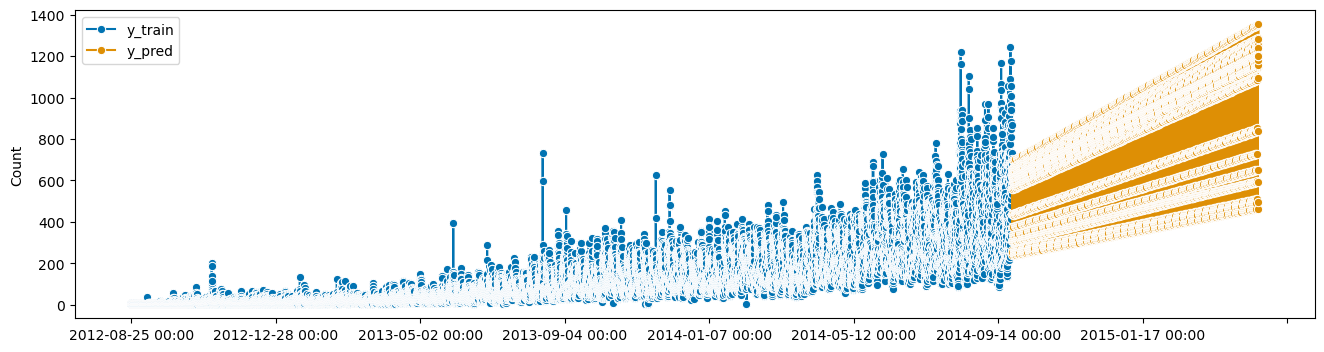

In [52]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_pred, labels=["y_train", "y_pred"])
plt.show()

In [61]:
submit = pd.read_csv("C:/Training/AV/Time Series/sample_submission_LSeus50.csv")
submit['Count'] = np.around(y_pred.values)
submit.to_csv("C:/Training/AV/Time Series/autoETS.csv", index=False)